In [1]:
import requests
import sys
import pandas as pd
import numpy as np
from scipy import sparse
from io import StringIO
import networkscience as ns
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# reading all datasets
country19_df = pd.read_csv('data\Erasmus19.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country18_df = pd.read_csv('data\Erasmus18.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country17_df = pd.read_csv('data\Erasmus17.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country16_df = pd.read_csv('data\Erasmus16.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country15_df = pd.read_csv('data\Erasmus15.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country14_df = pd.read_csv('data\Erasmus14.csv', sep=';',low_memory=False, header=0, encoding='utf8')

# merging all datasets
df = country19_df.append(country18_df)
df = df.append(country17_df)
df = df.append(country16_df)
df = df.append(country15_df)
df = df.append(country14_df)

In [3]:
# reply = requests.get('https://gitlab.com/data.europa.eu/data-provider-repository/-/raw/master/dg-eac/2021.05.11%20KA1%20mobilities%20eligible%20finalised%20started%20in%202018.csv?inline=false')
# reply.encoding = 'utf-8'
# csv_data = reply.text
# df = pd.read_csv(StringIO(csv_data), sep=';',low_memory=False, header=0)

for i, name in enumerate(df.columns):
    print(i, name)
df.drop(columns=['GroupLeader', 'Sending Organisation Erasmus Code', 'Receiving Organisation Erasmus Code'], inplace=True)
c_df = df.copy() # we will use it for later (country network)

0 Project Reference
1 Academic Year
2 Mobility Start Month
3 Mobility End Month
4 Mobility Duration
5 Activity (mob)
6 Field of Education
7 Participant Nationality
8 Education Level
9 Participant Gender
10 Participant Profile
11 Special Needs
12 Fewer Opportunities
13 GroupLeader
14 Participant Age
15 Sending Country Code
16 Sending City
17 Sending Organization
18 Sending Organisation Erasmus Code
19 Receiving Country Code
20 Receiving City
21 Receiving Organization
22 Receiving Organisation Erasmus Code
23 Participants


In [4]:
pd.options.display.max_columns=21
display(df)

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2016-3-EE01-KA105-034520,2019-2020,2019-03,2019-04,33.0,European Voluntary Service - Partner Countries,? Unknown ?,EE,??? - ? Unknown ?,Female,Learner,No,No,18,EE,TALLINN,MTÜ NOORTEVAHETUSE ARENGU ÜHING ESTYES,RU,Nizhny Novgorod,Interregional youth social movement of support...,1
1,2016-3-UK01-KA105-035288,2019-2020,2019-02,2019-03,56.0,European Voluntary Service - Partner Countries,? Unknown ?,IT,??? - ? Unknown ?,Male,Learner,No,Yes,29,IT,TRAPPETO,CESIE,UK,Cardiff,Language Academy Wales,1
2,2017-1-AT01-KA101-034705,2019-2020,2019-04,2019-04,6.0,Structured Courses/Training Events,Languages,AT,??? - ? Unknown ?,Female,Staff,No,No,39,AT,Hollabrunn,HTL Für Lebensmitteltechnologie-Lebensmittelsi...,EL,Heraklion,Institut für europäische Lehrerfortbildung UG ...,1
3,2017-1-AT01-KA101-034727,2019-2020,2019-02,2019-02,15.0,Structured Courses/Training Events,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,27,AT,Weiz,BHAK/BHAS Weiz,IE,Dublin,Atlantic Language Dublin,1
4,2017-1-AT01-KA101-034774,2019-2020,2019-02,2019-02,5.0,Structured Courses/Training Events,Education,AT,??? - ? Unknown ?,Female,Staff,No,No,26,AT,Linz,Bundesbildungsanstalt für Elementarpädagogik,MT,St.Julian's,Executive Training Institute Ltd.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235409,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,-1,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235410,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,27,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235411,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,No,25,TR,Istanbul,Toplum Gonulluleri Vakfi,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235412,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,UA,??? - ? Unknown ?,Female,Staff,No,No,22,UA,Kyiv,All-Ukrainian Association for Youth Co-operati...,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1


In [5]:
mobility_df = df[df[df.columns[10]]=='Learner']
mobility_df = mobility_df[mobility_df['Activity (mob)'].str.contains('Student')]
mobility_df = mobility_df[~mobility_df['Activity (mob)'].str.contains('traineeship')]
mobility_df = mobility_df.loc[:, df.columns[np.array((16, 19, 20, 5, 15, 18))]]
print((mobility_df['Receiving Organization'].nunique()))
print((mobility_df['Sending Organization'].nunique()))

5410
6505


In [6]:
for index in range(len(mobility_df['Sending Organization'])):
    s_uni = mobility_df.iat[index,0]
    r_uni = mobility_df.iat[index,1]
    if s_uni != s_uni.upper():
        mobility_df.iat[index,0] = s_uni.upper()
    if r_uni != r_uni.upper():
        mobility_df.iat[index,1] = r_uni.upper()

print('Number of Receiving Universities: ',(mobility_df['Receiving Organization'].nunique()))
print('Number of Sending Universities: ',(mobility_df['Sending Organization'].nunique()))
mobility_df

Number of Receiving Universities:  5220
Number of Sending Universities:  6253


,Sending Organization,Receiving Organization,Participants,Activity (mob),Sending City,Receiving City
276,CHINA FOREIGN AFFAIRS UNIVERSITY,DIPLOMATISCHE AKADEMIE WIEN,1,Student mobility for Studies To/From Partner C...,Beijing,WIEN
277,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,SOUTHERN FEDERAL UNIVERSITY,1,Student mobility for Studies To/From Partner C...,Wien,ROSTOV ON DON
278,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
279,FEDERAL STATE BUDGET EDUCATIONAL INSTITUTION O...,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,SAINT PETERSBURG,Wien
280,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
...,...,...,...,...,...,...
214990,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214991,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214992,OXFORD BROOKES UNIVERSITY,UNIVERSIDAD DE ZARAGOZA,1,Student mobility for studies between Programme...,OXFORD,ZARAGOZA
214993,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO


In [7]:
nodes = np.array(list(set.union(set(mobility_df.loc[:, mobility_df.columns[0]]), set(mobility_df.loc[:, mobility_df.columns[1]]))))
node_position = {}
for i, name in enumerate(nodes):
    node_position[name] = i
nodes_df = pd.DataFrame({'Nodes': nodes})
mobility_df['SendId'] = (np.array(list(map(lambda x: node_position[x], mobility_df['Sending Organization']))))
mobility_df['RecId']= (np.array(list(map(lambda x: node_position[x], mobility_df['Receiving Organization']))))
# Adjacency matrix
adj_matrix_crs = sparse.csr_matrix((nodes.size, nodes.size),dtype=int)
adj_matrix_csc = sparse.csc_matrix((nodes.size, nodes.size),dtype=int)

In [8]:
mobility_serie = mobility_df.groupby(['SendId', 'RecId']).sum()
row = np.array(mobility_serie.index.get_level_values(1).tolist())
col = np.array(mobility_serie.index.get_level_values(0).tolist())
val = mobility_serie.values
adj_matrix_crs = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))

# cercasi 70 Gb di ram, no perditempo
# ns.visualize_adj(adj_matrix_crs)

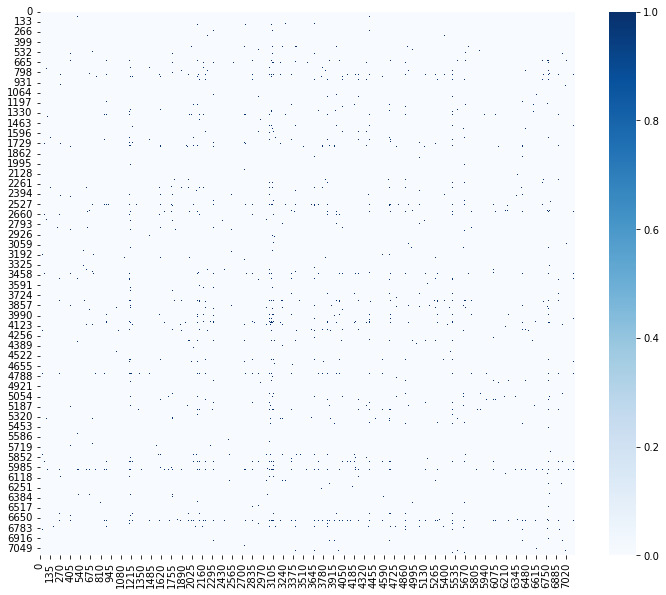

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
a_adj = adj_matrix_crs.toarray()
a_adj[a_adj>1] = 1
sns.heatmap(a_adj, cmap="Blues", ax=ax)
plt.show()

In [10]:
mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1, inplace=True)
uni_cities = mobility_df.copy()
adj_matrix_crs, mobility_df, nodes_df = ns.keep_giant(ns.find_components(adj_matrix_crs, nodes_df), mobility_df)

### Degree distribution

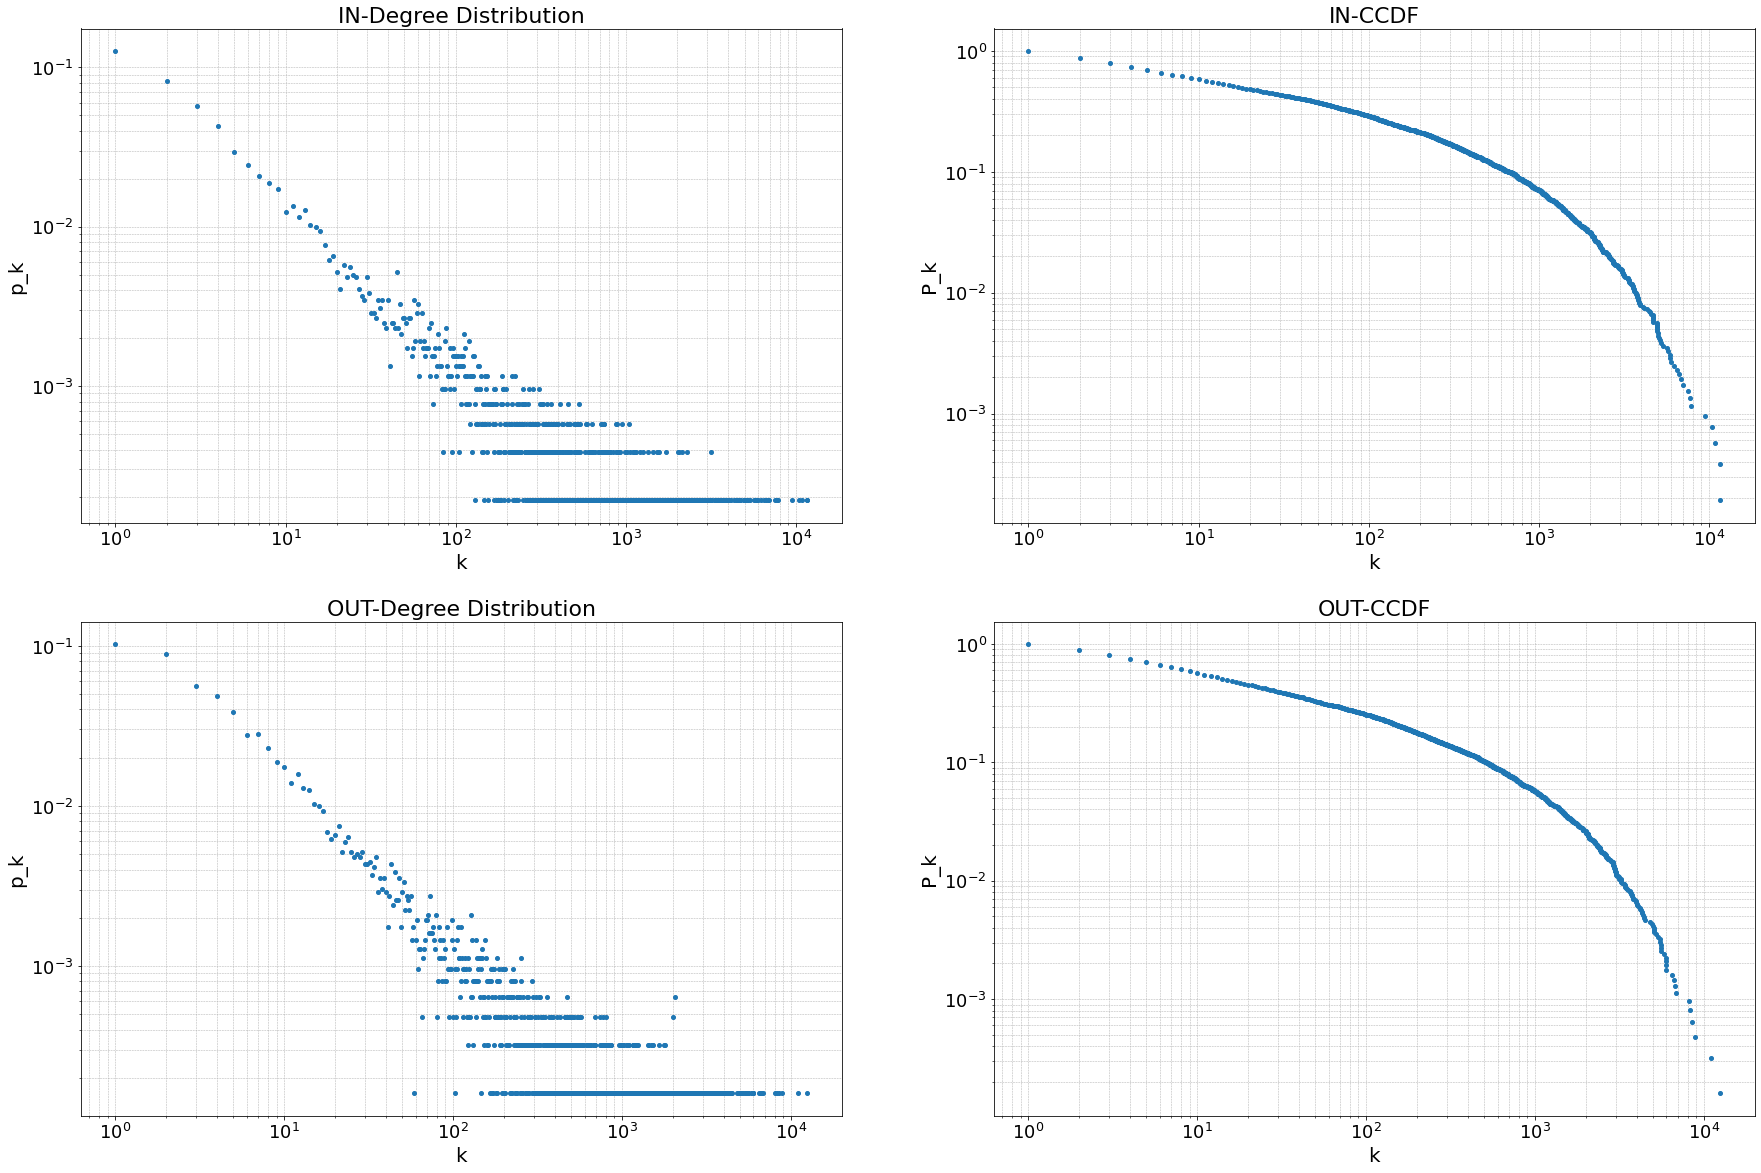

Top 10 for in degree


,Nodes,in degree
1410,UNIVERSITAT DE VALENCIA,11611
6658,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,11540
5651,UNIVERSIDAD DE GRANADA,10809
3549,UNIVERSIDADE DE LISBOA,10424
2164,UNIVERSIDAD COMPLUTENSE DE MADRID,9414
5509,UNIVERSITAT POLITECNICA DE VALENCIA,7854
1339,UNIVERZA V LJUBLJANI,7762
3643,KATHOLIEKE UNIVERSITEIT LEUVEN,7487
5104,UNIVERSIDAD DE SEVILLA,6978
3892,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,6818


Top 10 for out degree


,Nodes,out degree
6658,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,12477
5651,UNIVERSIDAD DE GRANADA,11026
1410,UNIVERSITAT DE VALENCIA,8866
2164,UNIVERSIDAD COMPLUTENSE DE MADRID,8467
1620,UNIVERSITA DEGLI STUDI DI PADOVA,8302
1472,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,8102
3643,KATHOLIEKE UNIVERSITEIT LEUVEN,6867
1656,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,6700
66,UNIVERSITA DEGLI STUDI DI TORINO,6664
1321,UNIVERSIDAD POLITECNICA DE MADRID,6446


In [11]:
scores = ns.degree_disribution(adj_matrix_crs, nodes_df, print_graph=True)
ns.display_top_n(scores, 10, 'in degree')
ns.display_top_n(scores, 10, 'out degree')

### Estimating $\gamma$ 

In [12]:
from collections import Counter
from statistics import mean

d_in = scores['in degree']
d_in = d_in[d_in>0]
d_out = scores['out degree']
d_out = d_out[d_out>0]
kmin = 100
d2_in = d_in[d_in>kmin]
d2_out = d_out[d_out>kmin]

sorted_d = sorted(d_in)
occurrence = Counter(sorted_d)
x_in = list(occurrence.keys())
y_in = list(occurrence.values())
y_in = y_in/np.sum(y_in)

sorted_d = sorted(d_out)
occurrence = Counter(sorted_d)
x_out = list(occurrence.keys())
y_out = list(occurrence.values())
y_out = y_out/np.sum(y_out)

Pk_in = 1 - np.cumsum(y_in)
Pk_in[-1] = 1 
Pk_in = sorted(Pk_in, reverse = True)
Pk_out = 1 - np.cumsum(y_out)
Pk_out[-1] = 1 
Pk_out = sorted(Pk_out, reverse = True)

In [13]:
ga_in = 1 + 1/mean(np.array(np.log(d2_in/kmin)))
ga_out = 1 + 1/mean(np.array(np.log(d2_out/kmin)))
C_in = (ga_in-1)*kmin**(ga_in-1) # normalization condition
C_out = (ga_out-1)*kmin**(ga_out-1)

pos_in = np.argmax(np.array(x_in)>=kmin)
pos_out = np.argmax(np.array(x_out)>=kmin)

P_kmin_in = Pk_in[pos_in] # constant value that shifts the line where the data are placed
pk_in = C_in*P_kmin_in*x_in**-ga_in
Pk_est_in = C_in*P_kmin_in*x_in**(-(ga_in-1))/(ga_in-1) 

P_kmin_out = Pk_out[pos_out] # constant value that shifts the line where the data are placed
pk_out = C_out*P_kmin_out*x_out**-ga_out
Pk_est_out = C_out*P_kmin_out*x_out**(-(ga_out-1))/(ga_out-1) 

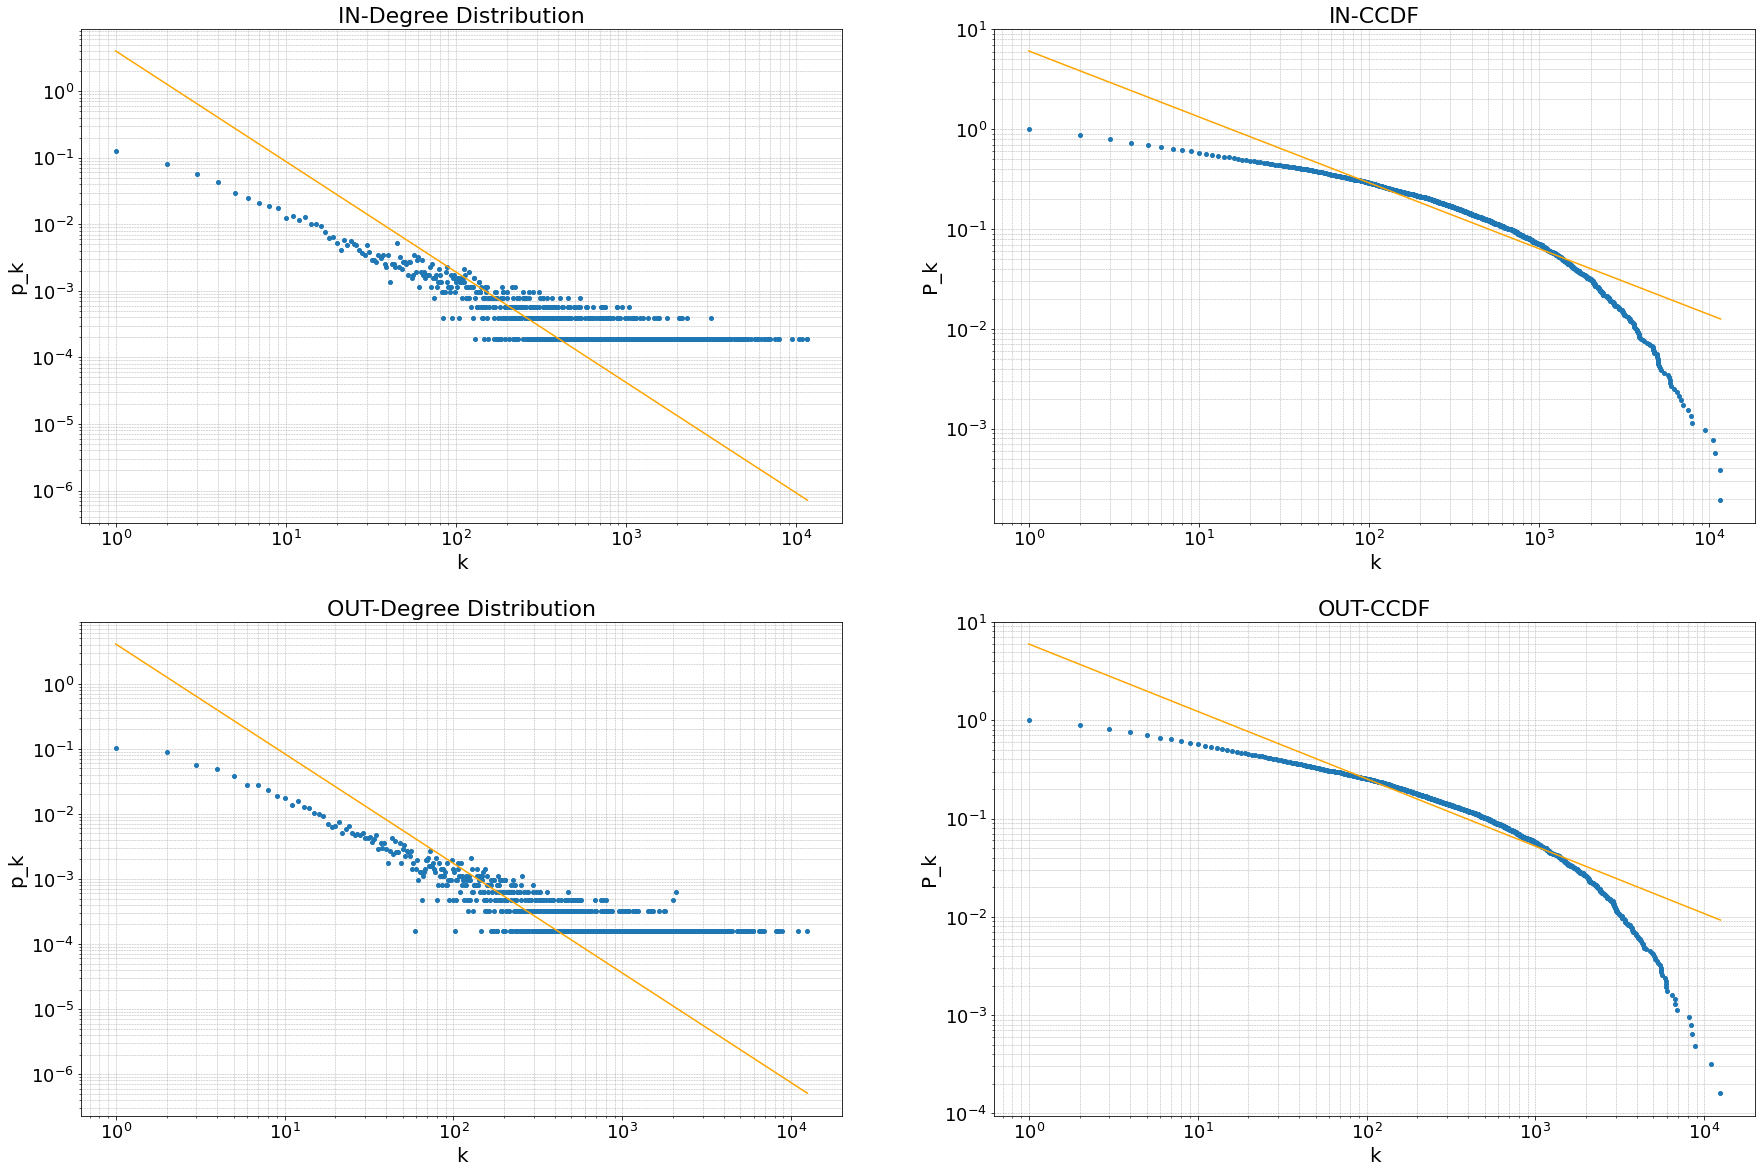

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (30, 20))

def plot_gamma(ax, x, y, title, p, cumulative=False):
    ax.loglog(x, y, 'o', markersize = 4)
    ax.loglog(x, p, color='orange')
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.set_title(title, size = 22)
    ax.set_xlabel("k", size = 20)
    if cumulative:
        ax.set_ylabel("P_k", size = 20)
    else:
        ax.set_ylabel("p_k", size = 20)
    ax.tick_params(labelsize=18)
    ax.tick_params(labelsize=18)

plot_gamma(ax[0,0], x_in, y_in, "IN-Degree Distribution", pk_in)
plot_gamma(ax[0,1], x_in, Pk_in, "IN-CCDF", Pk_est_in, True)
plot_gamma(ax[1,0], x_out, y_out, "OUT-Degree Distribution", pk_out)
plot_gamma(ax[1,1], x_out, Pk_out, "OUT-CCDF", Pk_est_out, True)
plt.show()

### Estimating $\gamma$ through a linear fit with log binning

In [15]:
# Log binning 
nbins = 20
bins = np.logspace(0, 3.3, nbins)

hist_in = np.histogram(d_in, bins=bins, density=True)
hist_out = np.histogram(d_out, bins=bins, density=True)
logbin_p_k_in = hist_in[0]
logbin_p_k_out = hist_out[0]
middle_bins = np.sqrt( np.delete(bins, 0) * np.delete(bins, nbins-1) )

mask = np.log10(middle_bins) > np.log10(kmin)
x = np.log10( middle_bins[mask] )
y_in = np.log10( logbin_p_k_in[mask] )
y_out = np.log10( logbin_p_k_out[mask] )

# Linear fit
params_in = np.polyfit(x, y_in, deg =1)
params_out = np.polyfit(x, y_out, deg =1)
lin_gamma_in = -params_in[0]
lin_gamma_out = -params_out[0]

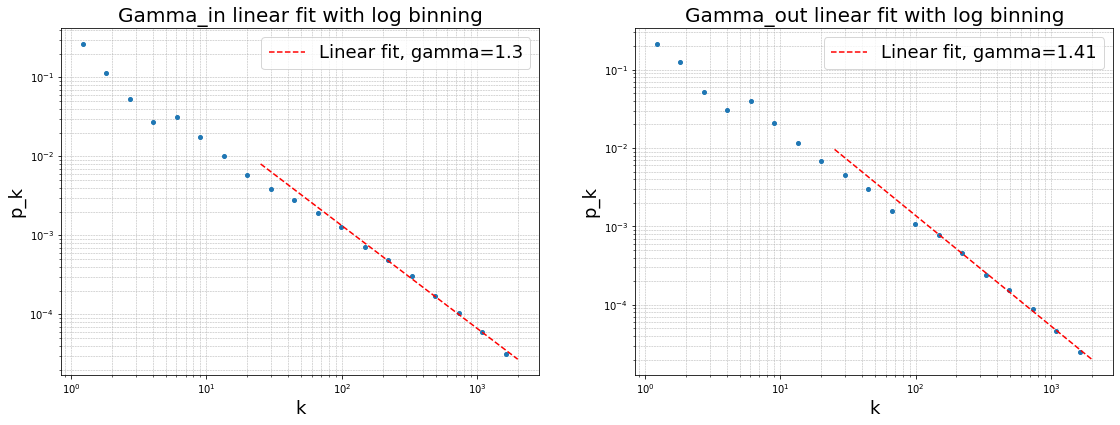

In [16]:
plt.figure(figsize=(60, 60))
plt.subplot(8, 6, 1)
plt.loglog(middle_bins, logbin_p_k_in , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_in linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_in[1])*x2**(-lin_gamma_in) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_in,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.subplot(8, 6, 2)
plt.loglog(middle_bins, logbin_p_k_out , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_out linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_out[1])*x2**(-lin_gamma_out) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_out,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.show()

### HITS (NetworkX)

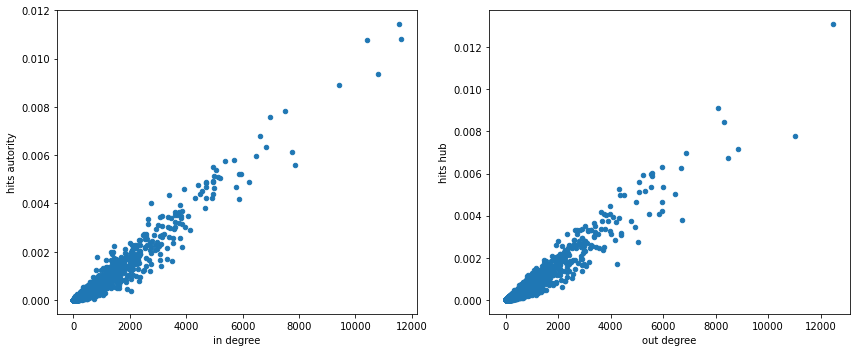

Top 10 for hits hub


,Nodes,hits hub
6658,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.013100
1472,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.009089
1620,UNIVERSITA DEGLI STUDI DI PADOVA,0.008444
5651,UNIVERSIDAD DE GRANADA,0.007785
1410,UNIVERSITAT DE VALENCIA,0.007185
3643,KATHOLIEKE UNIVERSITEIT LEUVEN,0.006954
2164,UNIVERSIDAD COMPLUTENSE DE MADRID,0.006739
3549,UNIVERSIDADE DE LISBOA,0.006314
66,UNIVERSITA DEGLI STUDI DI TORINO,0.006247
432,UNIWERSYTET WARSZAWSKI,0.006037


Top 10 for hits autority


,Nodes,hits autority
6658,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.011440
1410,UNIVERSITAT DE VALENCIA,0.010822
3549,UNIVERSIDADE DE LISBOA,0.010794
5651,UNIVERSIDAD DE GRANADA,0.009381
2164,UNIVERSIDAD COMPLUTENSE DE MADRID,0.008920
3643,KATHOLIEKE UNIVERSITEIT LEUVEN,0.007841
5104,UNIVERSIDAD DE SEVILLA,0.007591
5991,UNIVERSITAT DE BARCELONA,0.006804
3892,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.006340
1339,UNIVERZA V LJUBLJANI,0.006119


In [17]:
df = ns.hits_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'hits hub')
ns.display_top_n(scores, 10, 'hits autority')

### PageRank (NetworkX)

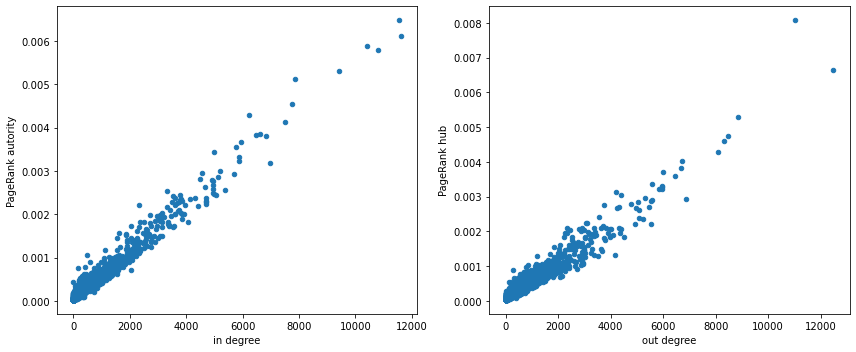

Top 10 for PageRank hub


,Nodes,PageRank hub
5651,UNIVERSIDAD DE GRANADA,0.008073
6658,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006650
1410,UNIVERSITAT DE VALENCIA,0.005288
2164,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004742
1620,UNIVERSITA DEGLI STUDI DI PADOVA,0.004605
1472,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.004285
1656,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,0.004039
66,UNIVERSITA DEGLI STUDI DI TORINO,0.003837
1339,UNIVERZA V LJUBLJANI,0.003712
1321,UNIVERSIDAD POLITECNICA DE MADRID,0.003598


Top 10 for PageRank autority


,Nodes,PageRank autority
6658,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006472
1410,UNIVERSITAT DE VALENCIA,0.006109
3549,UNIVERSIDADE DE LISBOA,0.005881
5651,UNIVERSIDAD DE GRANADA,0.005778
2164,UNIVERSIDAD COMPLUTENSE DE MADRID,0.005299
5509,UNIVERSITAT POLITECNICA DE VALENCIA,0.005129
1339,UNIVERZA V LJUBLJANI,0.004541
4600,POLITECNICO DI MILANO,0.004299
3643,KATHOLIEKE UNIVERSITEIT LEUVEN,0.004136
5991,UNIVERSITAT DE BARCELONA,0.003863


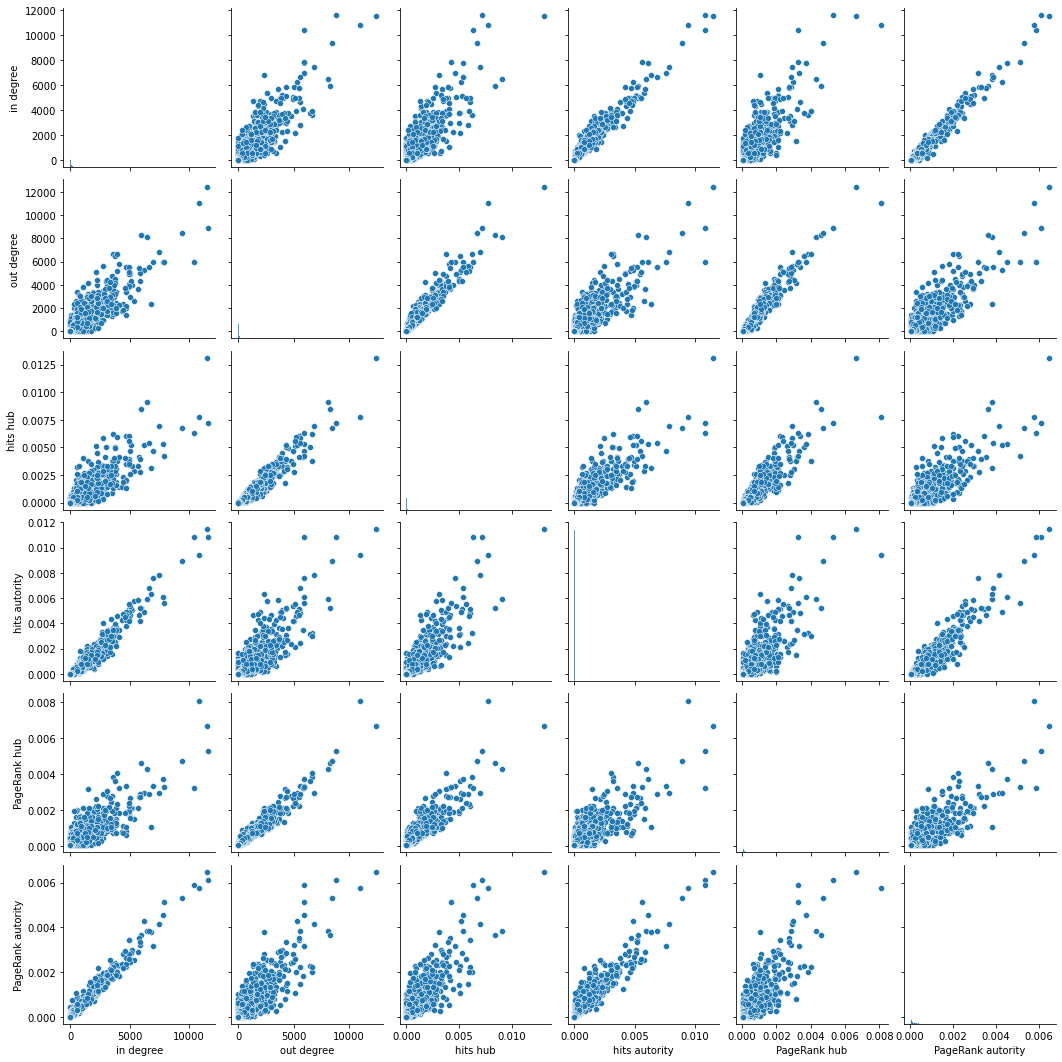

In [18]:
df = ns.pagerank_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'PageRank hub')
ns.display_top_n(scores, 10, 'PageRank autority')
# ci vuole troppo a farlo
sns.pairplot(scores[['in degree', 'out degree',  'hits hub',
       'hits autority', 'PageRank hub', 'PageRank autority']])
plt.show()
# from IPython.display import Image
# Image('pairplot_score.png',)

### Assortativity

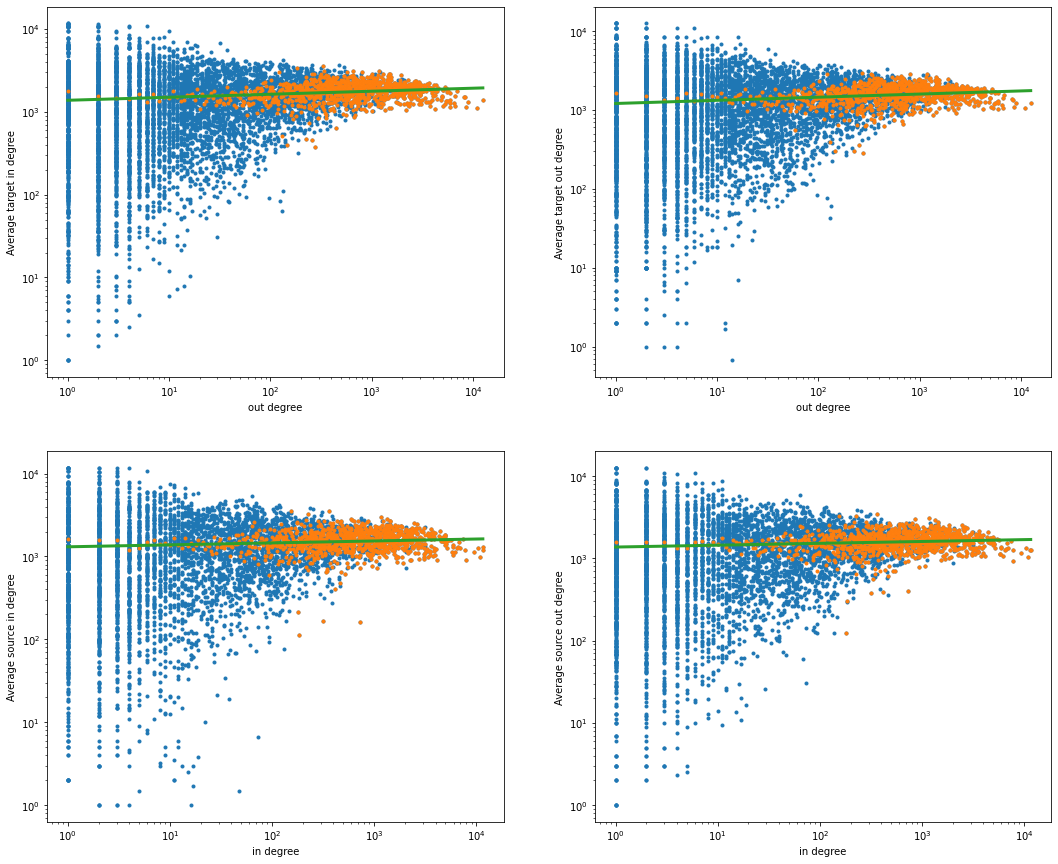

(0.03640513833878805,
 0.039789853926178544,
 0.023463112675281516,
 0.022562450954507176)

In [19]:
edges = mobility_df.copy()
ns.assortativity_calc(edges, adj_matrix_crs, nodes_df, True)

## Communities

In [21]:
import networkx as nx

# G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs)
G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs, create_using= nx.DiGraph)
p = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
node_comm = nodes_df.copy()
node_comm.drop(columns=['NodeID'], inplace=True)

node_comm['Community']=np.zeros(len(node_comm.index),dtype='int8')
for i, set in enumerate(p):
    for element in set:
        node_comm.iat[element, 1]=i
for i, set in enumerate(p):
    display(node_comm[node_comm['Community']==i])
    
scores['uni_Community'] = node_comm['Community']
# 52 communities. Choose if it makes sense to reduce the number of them 

,Nodes,Community
2,PANSTWOWA WYZSZA SZKOLA ZAWODOWA IM. STANISLAW...,0
3,MALTEPE UNIVERSITESI,0
5,VISOKA POSLOVNA SKOLA PAR,0
7,BSP BUSINESS SCHOOL BERLIN GMBH,0
8,THE FEDERAL STATE EDUCATIONAL INSTITUTION OF ...,0
...,...,...
7107,THE NATIONAL UNIVERSITY CORPORATION SHINSHU UN...,0
7108,SWANSEA METROPOLITAN UNIVERSITY,0
7110,ASSOCIATION FAMILIALE DE L'EXTERNAT SAINTE-MARIE,0
7111,UNIVERSITE DE MOSTAGANEM,0


,Nodes,Community
0,ESPAÇO ATLÂNTICO FORMAÇÃO FINANCEIRA SA,1
1,JIANGSU UNIVERSITY,1
4,HASKOLINN I REYKJAVIK EHF,1
6,COMMUNAUTE D'UNIVERSITES ET ETABLISSEMENTS UNI...,1
9,YORK UNIVERSITY,1
...,...,...
7099,UNIVERSITY OF ALBERTA,1
7102,KATHOLISCHE PRIVAT - UNIVERSITAT LINZ,1
7103,ACIBADEM MEHMET ALI AYDINLAR UNIVERSITESI,1
7105,INTER-UNIVERSITY CENTRE FOR ASTRONOMY AND ASTR...,1


,Nodes,Community
71,CONSERVATORIO SUPERIOR DE DANZA DE MÁLAGA ANGE...,2
76,STOCKHOLM UNIVERSITY OF THE ARTS,2
86,CONSERVATORIO SUPERIOR DE MÚSICA DE CASTILLA-L...,2
106,THE BRITISH UNIVERSITY IN EGYPT (BUE),2
114,"CONSERVATORIO STATALE DI MUSICA ""L. PEROSI"" CA...",2
...,...,...
6991,SIENA JAZZ - ACCADEMIA NAZIONALE DEL JAZZ,2
7008,VARNA FREE UNIVERSITY,2
7011,HUE ACADEMY OF MUSIC,2
7071,UNIVERSITÄT MOZARTEUM SALZBURG,2


,Nodes,Community
41,LUTHERAN THEOLOGICAL SEMINARY,3
47,NEPAL JESUIT SOCIETY,3
48,INSTITUT REGIONAL DU TRAVAIL SOCIAL AQUITAINE,3
69,SCUOLA SUPERIORE PER MEDIATORI LINGUISTICI CAR...,3
113,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER LE N...,3
...,...,...
6903,MATER DEI INSTITUTE,3
6948,"NATIONAL SPORTS ACADEMY ""VASSIL LEVSKI""",3
6967,KATHOLISCHE HOCHSCHULE FREIBURG,3
6973,NORTHERN BUSINESS SCHOOL HOCHSCHULE FÜR MANAGE...,3


,Nodes,Community
10,ACADEMIA DE ADMINISTRARE PUBLICA,4
111,PROVIDENCE UNIVERSITY,4
180,TURGUT OZAL EDUCATION SHA,4
253,GORI STATE TEACHING UNIVERSITY,4
258,IES RICARDO MELLA,4
...,...,...
6907,CEBEM FORMACIÓN PROFESIONAL SL,4
6957,IES LUIS SEOANE,4
6982,NLA HØGSKOLEN,4
6998,CIPFP VALLE DE ELDA,4


,Nodes,Community
24,UNIVERSITATEA PETROL SI GAZE PLOIESTI,5
82,T.C. MALTEPE UNIVERSITESI,5
132,THE NATIONAL MINERAL RESOURCES UNIVERSITY (THE...,5
156,HOCHSCHULE DER BUNDESAGENTUR FUER ARBEIT,5
174,OMSK STATE UNIVERSITY N.A. F.M.DOSTOEVSKY,5
...,...,...
6125,DMT - GESELLSCHAFT FÜR LEHRE UND BILDUNG MBH -...,5
6162,INSTITUTO PROFESIONAL ALEMÁN WILHELM VON HUMBOLDT,5
6275,INSTITUT PROTESTANT DE THEOLOGIE ASSOCIATION,5
6293,FREIE THEOLOGISCHE HOCHSCHULE GIESSEN,5


,Nodes,Community
105,ST. AUGUSTINE UNIVERSITY OF TANZANIA,6
213,INSTITUT NATIONAL D'ETUDES SUPERIEURES AGRONOM...,6
335,REGIE ECOLE SUPERIEURE DE PHYSIQUE ET DE CHIMI...,6
480,"UNIVERSIDAD CENTROAMERICANA ""JOSÉ SIMEÓN CAÑAS""",6
509,MALAYER UNIVERSITY,6
...,...,...
6735,UNIVERSIDAD DON BOSCO,6
6829,O.M. BEKETOV NATIONAL UNIVERSITY OF URBAN ECON...,6
6876,AGRICULTURAL UNIVERSITY OF GEORGIA,6
6989,VELEUCILISTE U POZEGI,6


,Nodes,Community
2222,UNIVERSITE ALQUARAOUIYINE,7
3501,UNIVERSITE IBNOU ZOHR A AGADIR,7
3851,INTERNATIONAL CENTRE FOR EDUCATION IN ISLAMIC ...,7
4800,ISTANBUL SABAHATTIN ZAIM UNIVERSITY,7
4915,UNIVERSITE EZ-ZITOUNA,7
5122,MIDDLE EAST UNIVERSITY,7
6845,ISLAMIC UNIVERSITY OF APPLIED SCIENCES ROTTERDAM,7


,Nodes,Community
133,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER TECN...,8
1160,CENTRO INTEGRAL DE FP ILERNA S.L.,8
1477,SOUTH WEST COLLEGE,8
3805,IES HOTEL ESCUELA,8
6277,LYCÉE DES MÉTIERS DE L'HÔTELLERIE ET DU TOURIS...,8
6436,IES MARIA DE ZAYAS Y SOTOMAYOR,8
7100,CENTRE INTEGRAL DE FP ILERNA S.L.,8


,Nodes,Community
1652,LONDON SCHOOL OF THEOLOGY,9
1965,ÖREBRO SCHOOL OF THEOLOGY,9
2098,KAREN BAPTIST THEOLOGICAL SEMINARY,9
2149,AKADEMI FÖR LEDARSKAP OCH TEOLOGI,9
4257,ANSGAR TEOLOGISKE HØGSKOLE,9
4978,EESTI EVANGEELIUMI KRISTLASTE JA BAPTISTIDE KO...,9


,Nodes,Community
1270,IRKUTSK STATE UNIVERSITY,10
1572,SAINT PETERSBURG NATIONAL RESEARCHUNIVERSITY O...,10
2909,SAINT PETERSBURG NATIONAL RESEARCH UNIVERSITY ...,10
4783,HOCHSCHULE ZITTAU/GOERLITZ,10
6000,BAIKAL STATE UNIVERSITY,10


,Nodes,Community
4174,VISOKA SOLA ZA UPRAVLJANJE IN POSLOVANJE NOVO ...,11
4365,VISOKA SKOLA ZA MENADZMENT U TURIZMU I INFORMA...,11
4647,"FAKULTETA ZA UPRAVLJANJE, POSLOVANJE IN INFORM...",11
4824,COLLEGE OF PROFESSIONAL STUDIES IN MANAGEMENT ...,11
7020,VISOKA POSLOVNA STRUKOVNIH SKOLA STDIJA U NOVO...,11


,Nodes,Community
1722,HAUTE ECOLE PAUL-HENRI SPAAK,12
2297,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL DE CHAMPAG...,12
3332,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL NORMANDIE ...,12
5350,HAUTE ECOLE BRUXELLES-BRABANT (HE2B),12


,Nodes,Community
1353,LYCEE OZENNE,13
1985,INSTITUT JOAN BROSSA,13
2799,LYCÉE GEORGES DUBY,13


,Nodes,Community
896,CENTRE INTERNATIONAL DES HAUTES ETUDES AGRONOM...,14
3336,LEBANESE UNIVERSITY,14
3488,INSTITUT NATIONAL AGRONOMIQUE DE TUNISIE,14


,Nodes,Community
80,"INSTITUT SUPÉRIEUR DE L'EDUCATION SPÉCIALISÉE,...",15
3218,INSTITUT NATIONAL SUPERIEUR DE FORMATION ET DE...,15
3553,ASTRAKHAN STATE UNIVERSITY,15


,Nodes,Community
2718,NOVOSIBIRSK STATE UNIVERSITY,16
4258,ECOLE INTERNATIONALE DES SCIENCES DU TRAITEMEN...,16
5121,STATE EDUCATIONAL INSTITUTION OF HIGHER PROFES...,16


,Nodes,Community
2649,ACADEMIA DRUZBA ZA STORITVE DOO,17
3084,UNIVERSIDAD TECNOLOGICA DE EL SALVADOR,17
5287,EUROPEAN UNIVERSITY - REPUBLIC OF MACEDONIA,17


,Nodes,Community
413,RELIGIOUS ORGANIZATION OF HIGHER THEOLOGICAL E...,18
4543,KYIV THEOLOGICAL ACADEMY AND SEMINARY OF UKRAI...,18
5349,ANOTATI ECCLESIASTIKI AKADEMIA THESSALONIKIS,18


,Nodes,Community
2023,ESCOLA NAVAL,19
3080,UNITED STATES NAVAL ACADEMY,19
5466,ECOLE NAVALE GROUPEMENT INTERET PUBLIC,19


,Nodes,Community
3074,LYCEE LOUISE MICHEL,20
4182,INS JOAQUIM MIR,20
5975,LYCÉE GÉNÉRAL ET TECHNOLOGIQUE JEAN MACE,20


,Nodes,Community
260,UNIVERSIDAD NACIONAL ARTURO JAURETCHE,21
4825,WSZECHNICA POLSKA SZKOLA WYZSZA W WARSZAWIE,21
6815,PUSHKIN STATE RUSSIAN LANGUAGE INSTITUTE,21


,Nodes,Community
671,FONDAZIONE UNICAMPUS SAN PELLEGRINO,22
1454,THE MAXIM GORKY LITERARY INSTITUTE,22


,Nodes,Community
1363,EVANGELISCHE HOCHSCHULE FÜR KIRCHENMUSIK TÜBINGEN,23
2058,ERSTA SKÖNDAL BRÄCKE HÖGSKOLA,23


,Nodes,Community
1683,VOLGA STATE UNIVERSITY OF TECHNOLOGY,24
2595,VYSOKA SKOLA DANUBIUS S.R.O.,24


,Nodes,Community
1149,SUD MANAGEMENT,25
3192,ACCOUNTANCY & BUSINESS COLLEGE (IRELAND) LIMIT...,25


,Nodes,Community
1625,LYCEE AMPERE,26
3376,INSTITUT POBLENOU,26


,Nodes,Community
3161,AMERICAN UNIVERSITY OF SCIENCE AND TECHNOLOGY,27
3419,YNCRÉA HAUTS DE FRANCE ISEN-LILLE,27


,Nodes,Community
3282,HOCHSCHULE FÜR ANGEWANDTES MANAGEMENT GMBH,28
3647,PRIVATUNIVERSITÄT SCHLOSS SEEBURG,28


,Nodes,Community
645,PACIFIC LUTHERAN UNIVERSITY,29
4243,MF VITENSKAPELIG HØYSKOLE,29


,Nodes,Community
971,ESCOLA MUNICIPAL D'ART I DISSENY DE TERRASSA,30
4480,ISTITUTO DI CULTURA PANTHEON S.R.L.,30


,Nodes,Community
484,"SVEUČILIŠTE/UNIVERZITET ""VITEZ"" VITEZ",31
4657,COLLEGE OF APPLIED SCIENCES LAVOSLAV RUZICKA I...,31


,Nodes,Community
2254,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",32
4874,DUBNICKY TECHNOLOGICKY INSTITUT V DUBNICKI NAD...,32


,Nodes,Community
4273,EPLEFPA LOT ET GARONNE,33
4966,INSTITUTO DE EDUCACIÓN SECUNDARIA JUAN CARLOS I,33


,Nodes,Community
2356,PANSTWOWA WYZSZA SZKOLA ZAWODOWA IM. HIPOLITA ...,34
6108,PAVLO TYCHYNA UMAN STATE PEDAGOGICAL UNIVERSITY,34


,Nodes,Community
1354,HOLAR UNIVERSITY COLLEGE,35
6322,UNIVERSITY OF GUELPH NON-PROFIT CORPORATION,35


,Nodes,Community
3635,INSTITUTO DE EDUCACIÓN SECUNDARIA HOZGARGANTA,36
6400,VANCOUVER ISLAND UNIVERSITY,36


,Nodes,Community
6224,DAUGAVPILS MEDICAL COLLEGE,37
6639,MEHRABYAN MEDICAL INSTITUTE IN YEREVAN,37


,Nodes,Community
5890,STREDOEUROPSKA VYSOKA SKOLA V SKALICI,38
6760,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",38


,Nodes,Community
1631,PETROZAVODSK STATE GLAZUNOV CONSERVATOIRE,39
7002,"ISTITUTO SUPERIORE DI STUDI MUSICALI ""TOSCANINI""",39


,Nodes,Community
240,ESCUELA DE ARTE Y SUPERIOR DE CONSERVACIÓN Y R...,40
7019,ACCADEMIA DI BELLE ARTI ALDO GALLI - I.L.E.M. SRL,40


,Nodes,Community
4918,UNIVERSITY OF THE PUNJAB,41


## Geographical heatmap

In [23]:
city

nan

In [24]:
temp_df = uni_cities[['target', 'Receiving City']].copy()
temp_df.rename({'target':'source', 'Receiving City':'Sending City'},axis=1, inplace=True)
cities_uni = pd.concat([uni_cities[['source', 'Sending City']], temp_df]).drop_duplicates().reset_index(drop=True)
cities_uni.dropna(subset=['Sending City'], inplace=True)

for index in range(cities_uni.shape[0]):
    city = cities_uni.iat[index,1]
    if city != city.upper():
        cities_uni.iat[index,1] = city.upper()
cities_uni = cities_uni.drop_duplicates().reset_index(drop=True)
cities_uni = cities_uni.drop_duplicates(subset='source').reset_index(drop=True)

# assigning cities to each university in scores
cities_list = []
for u in scores['Nodes']:
    cities_list.append(list(cities_uni.loc[cities_uni['source'] == u, 'Sending City'])[0])

scores_cities = scores.copy()
scores_cities['City'] = cities_list

scores_cities

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City
0,ESPAÇO ATLÂNTICO FORMAÇÃO FINANCEIRA SA,0,10,1,0,4.514789e-07,8.956550e-06,0,0.000031,0.000029,1,VILA NOVA DE GAIA
1,JIANGSU UNIVERSITY,1,0,2,1,2.537067e-06,-0.000000e+00,1,0.000030,0.000027,1,ZHENJIANG
2,PANSTWOWA WYZSZA SZKOLA ZAWODOWA IM. STANISLAW...,2,333,57,2,4.352162e-05,6.516879e-05,2,0.000097,0.000159,0,KROSNO
3,MALTEPE UNIVERSITESI,3,42,170,3,8.253186e-05,1.830865e-05,3,0.000159,0.000044,0,MALTEPE ISTANBUL
4,HASKOLINN I REYKJAVIK EHF,4,806,253,4,1.952333e-04,5.855454e-04,4,0.000171,0.000450,1,REYKJAVIK
...,...,...,...,...,...,...,...,...,...,...,...,...
7108,SWANSEA METROPOLITAN UNIVERSITY,7108,25,0,7108,-0.000000e+00,5.959956e-06,7108,0.000029,0.000040,0,SWANSEA
7109,NATIONAL CHIAYI UNIVERSITY,7109,0,1,7109,5.977094e-07,-0.000000e+00,7109,0.000030,0.000027,1,CHIAYI CITY
7110,ASSOCIATION FAMILIALE DE L'EXTERNAT SAINTE-MARIE,7110,0,8,7110,1.320218e-06,-0.000000e+00,7110,0.000033,0.000027,0,LYON
7111,UNIVERSITE DE MOSTAGANEM,7111,0,13,7111,9.980353e-06,-0.000000e+00,7111,0.000035,0.000027,0,MOSTAGANEM


In [25]:
city_coord = pd.read_csv('worldcities.csv', encoding='utf8')
city_coord.drop(columns=['capital', 'population', 'id', 'iso3', 'country'], inplace=True)
for index in range(city_coord.shape[0]):
    city = city_coord.iat[index,0]
    if city != city.upper():
        city_coord.iat[index,0] = city.upper()
city_coord = city_coord.drop_duplicates().reset_index(drop=True)
scores_cities = pd.merge(left=scores_cities, right=city_coord, how='left', left_on='City', right_on='city')
scores_cities.dropna(subset=['city'], inplace=True)
scores_cities = scores_cities.drop_duplicates(subset='Nodes').reset_index(drop=True)
scores_cities

# some cities are missing like Milano, Torino, Madrid (these are also pretty much important)

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City,city,city_ascii,lat,lng,iso2,admin_name
0,ESPAÇO ATLÂNTICO FORMAÇÃO FINANCEIRA SA,0,10,1,0,4.514789e-07,8.956550e-06,0,0.000031,0.000029,1,VILA NOVA DE GAIA,VILA NOVA DE GAIA,Vila Nova de Gaia,41.1333,-8.6167,PT,Porto
1,JIANGSU UNIVERSITY,1,0,2,1,2.537067e-06,-0.000000e+00,1,0.000030,0.000027,1,ZHENJIANG,ZHENJIANG,Zhenjiang,32.2109,119.4551,CN,Jiangsu
2,VISOKA POSLOVNA SKOLA PAR,5,27,0,5,-0.000000e+00,1.664893e-05,5,0.000029,0.000056,0,RIJEKA,RIJEKA,Rijeka,45.3272,14.4411,HR,Primorsko-Goranska Županija
3,COMMUNAUTE D'UNIVERSITES ET ETABLISSEMENTS UNI...,6,26,0,6,-0.000000e+00,3.660363e-05,6,0.000029,0.000039,1,NICE,NICE,Nice,43.7034,7.2663,FR,Provence-Alpes-Côte d’Azur
4,BSP BUSINESS SCHOOL BERLIN GMBH,7,51,50,7,1.641665e-05,1.261133e-05,7,0.000047,0.000067,0,BERLIN,BERLIN,Berlin,52.5167,13.3833,DE,Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,RIVNE STATE UNIVERSITY OF HUMANITIES,7106,0,2,7106,4.084105e-07,-0.000000e+00,7106,0.000030,0.000027,0,RIVNE,RIVNE,Rivne,50.6197,26.2514,UA,Rivnens’ka Oblast’
4936,SWANSEA METROPOLITAN UNIVERSITY,7108,25,0,7108,-0.000000e+00,5.959956e-06,7108,0.000029,0.000040,0,SWANSEA,SWANSEA,Swansea,41.7571,-71.2120,US,Massachusetts
4937,ASSOCIATION FAMILIALE DE L'EXTERNAT SAINTE-MARIE,7110,0,8,7110,1.320218e-06,-0.000000e+00,7110,0.000033,0.000027,0,LYON,LYON,Lyon,45.7600,4.8400,FR,Auvergne-Rhône-Alpes
4938,UNIVERSITE DE MOSTAGANEM,7111,0,13,7111,9.980353e-06,-0.000000e+00,7111,0.000035,0.000027,0,MOSTAGANEM,MOSTAGANEM,Mostaganem,35.9333,0.0903,DZ,Mostaganem


Importing geographic data also for countries

In [26]:
import geopandas as gpd
import pycountry as pc #library used for translating country codes from iso3 to iso2 standard

geo_df = gpd.read_file('countries.geojson')

def replace_iso2(alpha):
    try:
        return pc.countries.get(alpha_3=alpha).alpha_2
    except:
        return alpha
    
geo_df['iso2_code']= (np.array(list(map(lambda x: replace_iso2(x), geo_df['ISO_A3']))))

geo_df.columns = ['country', 'country_code', 'geometry', 'iso2_code']

# in geo_df United Kingdom has code GB, so we have to change it manually
# geo_df.loc[geo_df['country'] == 'United Kingdom', 'iso2_code'] = 'UK'
# geo_df.loc[geo_df['country'] == 'Greece', 'iso2_code'] = 'EL'
geo_df.loc[geo_df['country'] == 'Kosovo', 'iso2_code'] = 'XK'
geo_df.loc[geo_df['country'] == 'Czech Republic', 'country'] = 'Czechia'
geo_df.loc[geo_df['country'] == 'Republic of Serbia', 'country'] = 'Serbia'

# merge geometries with our dataframe
geo_scores = pd.merge(left=scores_cities, right=geo_df[['iso2_code', 'geometry']], how='left', 
                      left_on='iso2', right_on='iso2_code')
geo_scores = geo_scores[['Nodes', 'PageRank hub', 'PageRank autority', 'City', 'lat', 'lng',
                         'iso2', 'geometry', 'uni_Community']]

Dividing universities by their country community

In [27]:
import networkx as nx

### 1 create the network of countries only
country_df = c_df[c_df[c_df.columns[10]]=='Learner']
country_df = country_df.loc[:, c_df.columns[np.array((14, 17, 20))]]
country_df.dropna(how='any', inplace=True)

# c_nodes = np.array(list(set.union(set(country_df.loc[:, country_df.columns[0]]), set(country_df.loc[:, country_df.columns[1]]))))
c_nodes = np.array(list(pd.concat([country_df.loc[:, country_df.columns[0]], country_df.loc[:, country_df.columns[1]]]).drop_duplicates()))
country_df.dropna(how='any', inplace=True)

c_node_position = {}
for i, name in enumerate(c_nodes):
    c_node_position[name] = i
country_nodes= pd.DataFrame({'Nodes': c_nodes})
country_df['SendId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Sending Country Code']))))
country_df['RecId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Receiving Country Code']))))
# Adjacency matrix
country_serie = country_df.groupby(['SendId', 'RecId']).sum()
row = np.array(country_serie.index.get_level_values(1).tolist())
col = np.array(country_serie.index.get_level_values(0).tolist())
val = country_serie.values
c_adj_matrix = sparse.csr_matrix((val.flatten(), (row, col)), shape=(c_nodes.size, c_nodes.size))

### 2 countries community
# G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix)
G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix, create_using= nx.DiGraph)
p_c = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_country)
country_comm = country_nodes.copy()
# some countries have a different code
country_comm.loc[country_comm['Nodes'] == 'UK', 'Nodes'] = 'GB'
country_comm.loc[country_comm['Nodes'] == 'EL', 'Nodes'] = 'GR'

country_comm['Community']=np.zeros(len(country_comm.index),dtype='int8')
for i, set in enumerate(p_c):
    for element in set:
        country_comm.iat[element, 1]=i
for i, set in enumerate(p_c):
    display(country_comm[country_comm['Community']==i])

geo_scores = pd.merge(left=geo_scores, right=country_comm, how='left', left_on='iso2', right_on='Nodes')

,Nodes,Community
1,IT,0
2,AT,0
6,ET,0
10,TH,0
11,KG,0
...,...,...
145,BI,0
149,MR,0
150,PA,0
151,BB,0


,Nodes,Community
0,EE,1
3,CN,1
4,RU,1
5,CU,1
7,RS,1
...,...,...
134,SK,1
146,BN,1
147,TL,1
148,BW,1


,Nodes,Community
22,UZ,2
38,BF,2
51,FR,2
74,NE,2
79,SG,2
...,...,...
130,SE,2
131,ZW,2
133,VE,2
138,CI,2


,Nodes,Community
29,BE,3
41,CD,3
45,SR,3
47,AL,3
62,DO,3
63,XK,3
68,BJ,3
82,KH,3
118,LT,3
137,GM,3


Focus on european countries

In [28]:
eu_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 
                'Netherlands', 'Belgium', 'Czechia', 'Greece', 'Portugal', 'Sweden', 'Hungary', 
                'Belarus', 'Austria', 'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway',
                'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'Macedonia', 
                'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Andorra', 'Monaco', 
                'Liechtenstein', 'Kosovo', 'Turkey']

def replace_iso3166(alpha):
    try:
        return pc.countries.get(name=alpha).alpha_2
    except:
        return alpha
    
eu_countries_iso2 = list(map(lambda x: replace_iso3166(x), eu_countries))

geo_scores = geo_scores[geo_scores['iso2'].isin(eu_countries_iso2)]

C:\Users\tomma\anaconda3\lib\site-packages\geopandas\plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\tomma\anaconda3\lib\site-packages\geopandas\plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


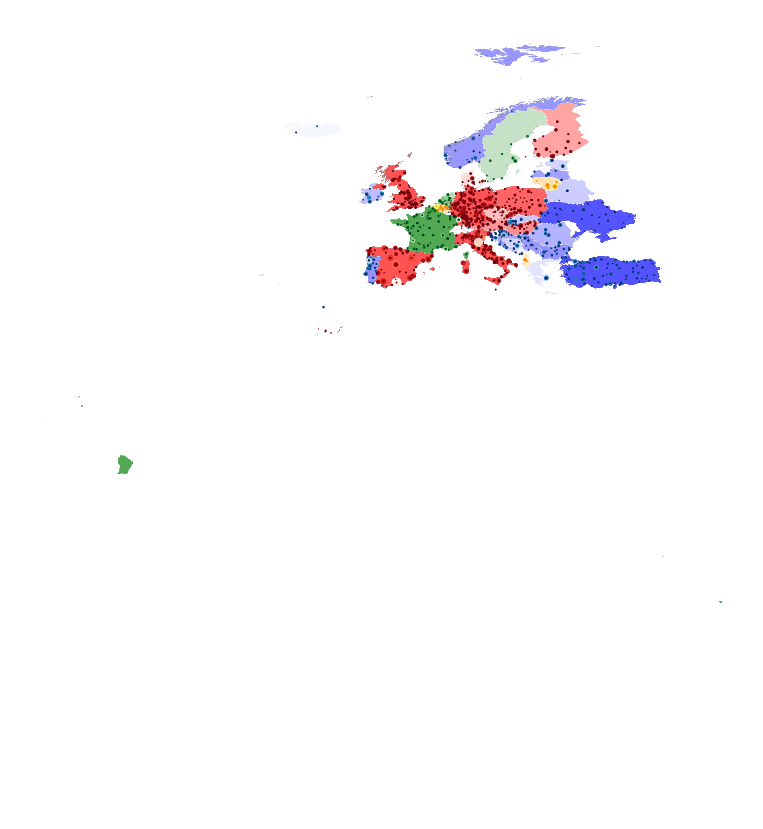

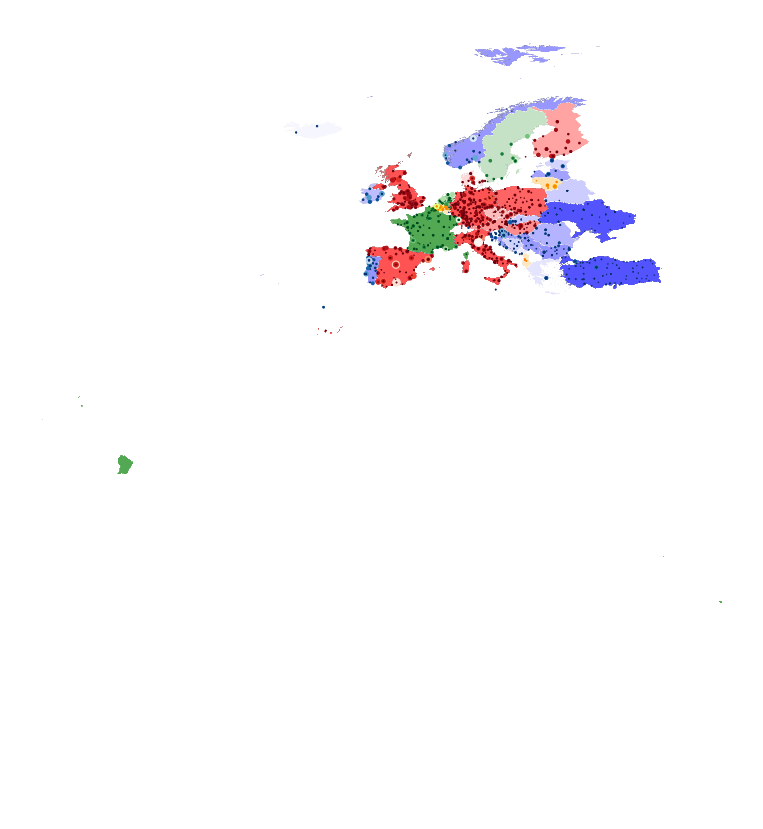

In [29]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey']
cmaps = ['Reds_r', 'Blues_r', 'Greens_r', 'Wistia_r', 'Purples_r', 'Greys_r']

fig, ax = plt.subplots(figsize=(20,15))

for c in range(6):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['PageRank hub'],
                  cmap=cmaps[c])
ax.axis('off')

plt.savefig('countries_communities & universities_hubs.png')

fig, ax = plt.subplots(figsize=(20,15))

for c in range(6):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, c=temp_df['PageRank autority'],
                  cmap=cmaps[c])
ax.axis('off')

plt.savefig('countries_communities & universities_authorities.png')

### Universities communities geographic plot

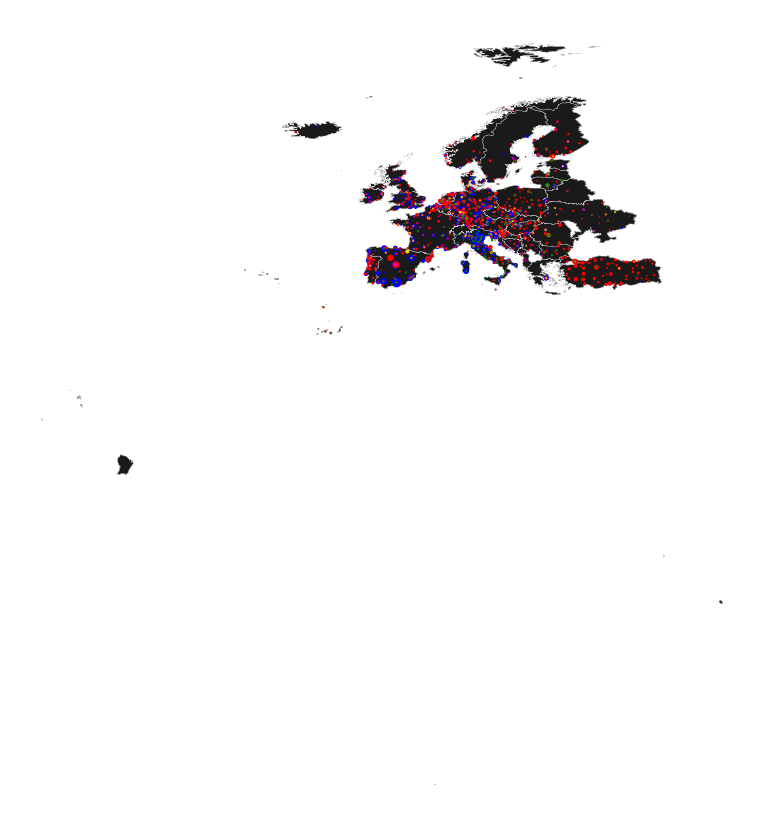

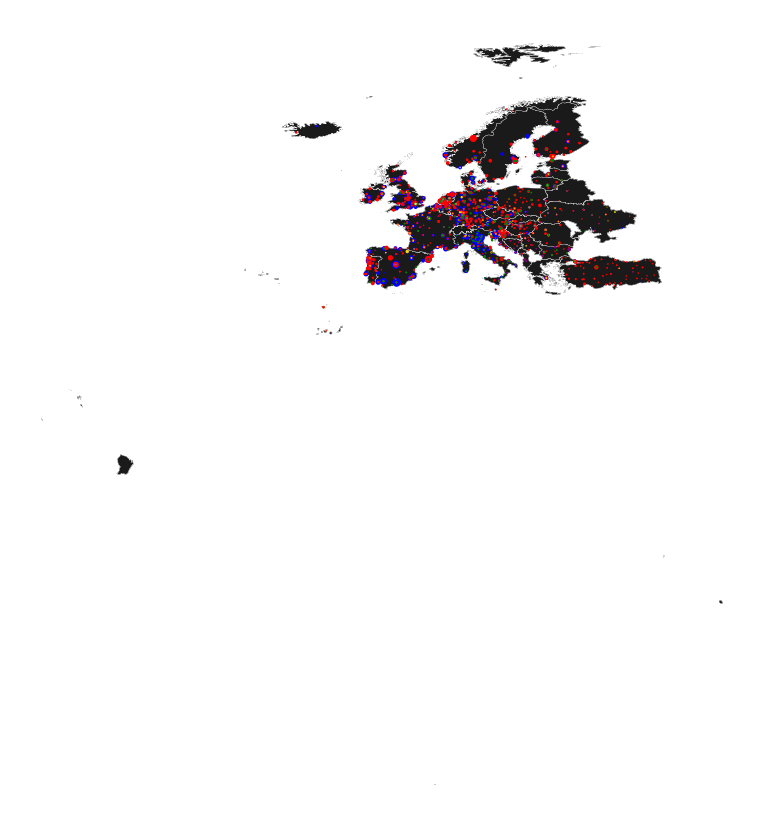

In [30]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey', 'gold', 'aqua', 'fuchsia', 'pink', 'yellow', 'salmon', 
          'khaki', 'brown', 'lime', 'skyblue', 'peachpuff', 'ivory', 'powderblue', 'rosybrown', 'royalblue', 
          'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue',
          'slategray', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet',
          'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen', 'lightgreen', 'lightgray', 'lightpink', 'lightsalmon', 
          'lightseagreen', 'lightskyblue', 'lightslategray']

geo_plt = geo_scores.copy()
# dropping all communities containing number of universities lower or equal than 2
for c in range(max(geo_plt['uni_Community'])):
    if geo_plt[geo_plt['uni_Community'] == c].shape[0] <= 2:
        geo_plt = geo_plt[geo_plt['uni_Community'] != c]
geo_plt = gpd.GeoDataFrame(geo_plt, geometry='geometry')

# universities sized on PageRank hub score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='1', linewidth=0.3, color='0.1')

# sns.scatterplot(x='lng', y='lat', data=geo_plt, hue='uni_Community', legend=False, ax=ax, size=geo_plt['PageRank hub']*10**4)
# ax.scatter(x=geo_plt['lng'], y=geo_plt['lat'], s=geo_plt['PageRank hub']*10**4, c=geo_plt['uni_Community'], cmap='jet')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'], cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'])
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_hubs.png')

# universities sized on PageRank authority score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='1', linewidth=0.3, color='0.1')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_authorities.png')

### Robustness

In [ ]:
#attack: removing hubs first
nodes_byhub = scores.sort_values('PageRank hub', ascending=False)['NodeID']
indices = list(nodes_byhub)
uni_df = mobility_df.copy()
GC_frac_a = [1]
for node in indices:
    uni_df = uni_df.loc[(uni_df['sourceID'] != node) & (uni_df['targetID'] != node)]
    temp_serie = uni_df.groupby(['sourceID', 'targetID']).sum()
    row = np.array(temp_serie.index.get_level_values(1).tolist())
    col = np.array(temp_serie.index.get_level_values(0).tolist())
    val = temp_serie.values
    temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
    GC_frac_a.append(ns.fraction_in_giant(temp_adj))


In [ ]:
#random node removal
import random
#10 by 10, with average over 10 trials each time
intervals = list(range(10, len(nodes_byhub+1), 10))
uni_df = mobility_df.copy()
GC_frac_r = [1]
for i in intervals:
    i_GC_frac = []
    for j in range(10):
        removed = random.sample(indices, i)
        temp_df = uni_df.loc[~(uni_df['sourceID'].isin(removed) | (uni_df['targetID'].isin(removed)))]
        temp_serie = temp_df.groupby(['sourceID', 'targetID']).sum()
        row = np.array(temp_serie.index.get_level_values(1).tolist())
        col = np.array(temp_serie.index.get_level_values(0).tolist())
        val = temp_serie.values
        temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
        i_GC_frac.append(ns.fraction_in_giant(temp_adj))
    GC_frac_r.append(sum(i_GC_frac)/10)

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot([i/len(nodes_byhub) for i in range(len(nodes_byhub)+1)], GC_frac_a, label='Targeted attack')
plt.plot([0]+[i/(len(intervals)*10) for i in intervals], GC_frac_r, 'r', label='Random node removal')
plt.plot([0,1], [1,0], 'g', label='linear reference')
plt.xlabel('Fraction of nodes in the giant component', size=14)
plt.ylabel('Fraction of removed nodes', size=14)
plt.title('Robustness', size=20)
plt.legend(fontsize=16)
plt.show()